In [1]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
from numpy.linalg import norm

import scipy.stats as st 

import matplotlib.pyplot as plt

import pints

import smol_ODE_Pro_clus_size


Mass 896.7231536242365


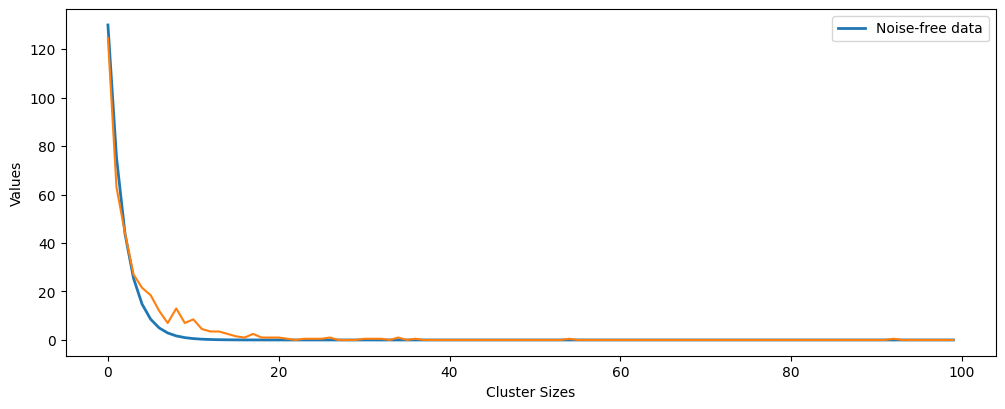

In [2]:
df = pd.read_csv('2017-03-16_inference_input_multi_well_t_20.csv', header=None)
org_values = np.transpose(df.to_numpy())
N_max = 100



b_best = [1.93e-04]
m_best = [1.56e-03]
N = [717]
## Running of solver
tmin = 1
tmax = 145
# tmax = 1000
tspan = np.linspace(tmin, tmax, 145)

## IC 
# (set to allow for metastatic invasion)

n0 = np.zeros((N_max))
n0[0] = N[0]


b = b_best[0]
m = m_best[0]


result = odeint(smol_ODE_Pro_clus_size.ext_smol,n0,tspan,args = (b,m,N_max))

final_time = result[-1,:]

N_t = 0
for i in range(len(final_time)):
    N_t += (i+1)*final_time[i]

print('Mass', N_t)



result_interested = result[19:,:]




# x = np.linspace(1,101,100)
# for j in range(np.shape(org_values)[0]):
#     plt.xlabel('Cluster Sizes')
#     plt.ylabel('Values')
#     plt.plot(x,result_interested[j,:], lw=2, label='Model outputs')
#     plt.plot(x,org_values[j,:], label = 'Data outputs')
#     plt.legend()
#     plt.savefig(f'homogeneous_3D/fit_plot_frames/proliferation_clus_size_basic_frame-{j:02d}.png')
#     plt.clf()

# for j in range(np.shape(org_values_grouped)[0]):
#     plt.xlabel('Cluster Sizes')
#     plt.ylabel('Values')
#     plt.plot(result_grouped[j,:], lw=2, label='Model outputs')
#     plt.plot(org_values_grouped[j,:], label = 'Data outputs')
#     plt.legend()
#     plt.savefig(f'homogeneous_3D/fit_plot_frames/grouped_cluster_sizes/proliferation_clus_size_basic_frame-{j:02d}.png')
#     plt.clf()
#     # plt.show()


plt.figure(2,figsize=(12,4.5))
plt.xlabel('Cluster Sizes')
plt.ylabel('Values')
# plt.plot(values[-1,:], label='Noisy data')
plt.plot(result[19,:], lw=2, label='Noise-free data')
plt.plot(org_values[0,:])
plt.legend()
plt.show()




In [3]:
import statistics
df = pd.read_csv('INV_clus_size_pro_Chains.csv', sep=',', header=None)

Chain_values = df.to_numpy()

print(np.shape(Chain_values))

b_best = Chain_values[:,0]
m_best = Chain_values[:,1]
N_best = Chain_values[:,2]

b_best

b_st_dev = statistics.stdev(b_best)
m_st_dev = statistics.stdev(m_best)
N_st_dev = statistics.stdev(N_best)

b_mean = statistics.mean(b_best)
m_mean = statistics.mean(m_best)
N_mean = statistics.mean(N_best)


b_best = [b_mean + 2*b_st_dev, b_mean + 2*b_st_dev, b_mean + 2*b_st_dev, b_mean + 2*b_st_dev,
          b_mean - 2*b_st_dev, b_mean - 2*b_st_dev, b_mean - 2*b_st_dev, b_mean - 2*b_st_dev]

m_best = [m_mean + 2*m_st_dev, m_mean + 2*m_st_dev, m_mean - 2*m_st_dev, m_mean - 2*m_st_dev,
          m_mean + 2*m_st_dev, m_mean + 2*m_st_dev, m_mean - 2*m_st_dev, m_mean - 2*m_st_dev]

N_best = [N_mean + 2*N_st_dev, N_mean - 2*N_st_dev, N_mean + 2*N_st_dev, N_mean - 2*N_st_dev,
          N_mean + 2*N_st_dev, N_mean - 2*N_st_dev, N_mean + 2*N_st_dev, N_mean - 2*N_st_dev]

N_best

(900, 7)


[742.3832637501619,
 690.0992294542307,
 742.3832637501619,
 690.0992294542307,
 742.3832637501619,
 690.0992294542307,
 742.3832637501619,
 690.0992294542307]

In [4]:

## Running of solver
tmin = 1
tmax = 145
tspan = np.linspace(tmin, tmax, 145)

## IC 
# (set to allow for metastatic invasion)

result_array_3D = np.zeros((126,100,len(b_best)))
# result_array_3D = np.zeros((111,100,10))

# for i in range(10):
for i in range(len(b_best)):
    print('Sim number', i)

    n0 = np.zeros((N_max))
    n0[0] = N_best[i]


    b = b_best[i]
    m = m_best[i]


    result = odeint(smol_ODE_Pro_clus_size.ext_smol,n0,tspan,args = (b,m,N_max))
    result_interested = result[19:,:]

    result_array_3D[:,:,i] = result_interested

final_time = result[-1,:]





Sim number 0


Sim number 1
Sim number 2
Sim number 3
Sim number 4
Sim number 5
Sim number 6
Sim number 7


In [5]:
for i in range(8):
    print(statistics.mean(result_array_3D[0,:,i]))

print(statistics.mean(org_values[0,:]))

3.1210898814346284
3.0247459089079354
3.12108988142993
3.024745908902605
3.1719426140172913
3.0724835731136255
3.17194261401321
3.0724835731094555
3.75


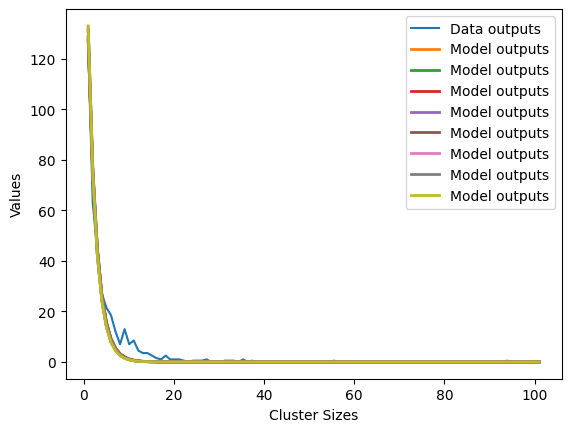

In [6]:

x = np.linspace(1,101,100)

plt.plot(x,org_values[0,:], label = 'Data outputs')
for i in range(8):
    plt.xlabel('Cluster Sizes')
    plt.ylabel('Values')
    plt.plot(x,result_array_3D[0,:,i], lw=2, label='Model outputs')
    plt.legend()
plt.show()

In [10]:

x = np.linspace(1,101,100)
for j in range(np.shape(org_values)[0]):
    plt.plot(x,org_values[j,:], label = 'Data outputs')
    for i in range(8):
        plt.xlabel('Cluster Sizes')
        plt.ylabel('Values')
        plt.plot(x,result_array_3D[j,:,i], lw=2, label='Model outputs')
        plt.legend()
        plt.savefig(f'fit_plot_frames/CI_proliferation_clus_size_basic_frame-{j:02d}.png')
    plt.clf()

<Figure size 640x480 with 0 Axes>

In [8]:

np.shape(org_values)

(126, 100)

NameError: name 'CI' is not defined

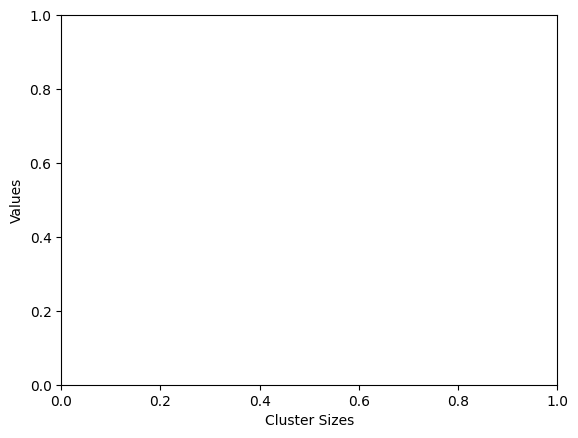

In [9]:

x = np.linspace(1,101,100)
plt.xlabel('Cluster Sizes')
plt.ylabel('Values')
plt.plot(x,CI[0,:,0], lw=2, label='Model outputs')
plt.plot(x,CI[0,:,1], lw=2, label='Model outputs')
plt.plot(x,org_values[0,:], label = 'Data outputs')
plt.legend()
plt.show()

In [ ]:


# define sample data 
gfg_data = [1, 1, 1, 2, 2, 2, 3, 3, 3, 
            3, 3, 4, 4, 5, 5, 5, 6, 
            7, 8, 10] 
  
# create 99% confidence interval 
st.t.interval(confidence=0.99, 
              df=len(gfg_data)-1, 
              loc=np.mean(gfg_data),  
              scale=st.sem(gfg_data))

(2.3481954013214263, 5.4518045986785735)